In [1]:
# automatically reload imported modules
%load_ext autoreload
%autoreload 2
import helper.get_image
import numpy as np
from filters.bilateral import bilateral_canny

## training a model, better 1 layer CNN

In [1]:

FOLDER_PATH = 'F://term7//CV//reference'

# random
train_size = 200
test_size = 100
val_size = 40

img_range = np.arange(1, 800)
X_train_pos_idx, X_test_pos_idx, X_val_pos_idx = helper.get_random_indices(img_range, train_size, test_size, val_size)
X_train_neg_idx, X_test_neg_idx, X_val_neg_idx = helper.get_random_indices(img_range, train_size, test_size, val_size)

X_train, Y_train = helper.get_concrete_data(X_train_pos_idx, X_train_neg_idx, path = FOLDER_PATH)
#X_test , Y_test  = helper.get_concrete_data(X_test_pos_idx, X_test_neg_idx, path = FOLDER_PATH)
#X_val  , Y_val   = helper.get_concrete_data(X_val_pos_idx, X_val_neg_idx, path = FOLDER_PATH)

print( X_train.shape, Y_train.shape )
#print( X_test.shape , Y_test.shape  )
#print( X_val.shape  , Y_val.shape   )

(400, 227, 227) (400,)


In [2]:

bilateral_canny = bilateral_canny()
for idx in range(X_train.shape[0]):
    X_train[idx] = bilateral_canny.bilateral_canny_img(X_train[idx]) 

In [3]:
X_train_flat = X_train.reshape(X_train.shape[0],-1)

In [4]:
# train a logistic model
from sklearn import linear_model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X_train_flat, Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## video generation

### video to frames

In [7]:
video_file = "F://term7//CV//ProjectTrail//videos//File_003.mov"
frame_folder = "F://term7//CV//ProjectTrail//File_003frame"
output_frame_folder =  "F:\\term7\\CV\\ProjectTrail\Output002adath\\"
output_video = "F://term7//CV//ProjectTrail//videos//OutFile_002.mov"

from video import video
v = video(video_file)
# v.video_to_frames(frame_folder)

### process to video

In [8]:
 %reload_ext autoreload

In [9]:
from preprocessing import shadow_reduction
import helper.utils
import helper
print(dir(helper))
from helper import rolling_window, shade_area, utils, generate_shadowed_img
import preprocessing.shadow_reduction
import cv2

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'binary_dilation', 'ceil', 'cv2', 'floor', 'generate_shadowed_img', 'generate_sub_frames', 'get_concrete_data', 'get_image', 'get_images', 'get_random_indices', 'get_stride', 'glob', 'ndimage', 'np', 'os', 'rename', 'rolling_window', 'save_image', 'shade_area', 'sys', 'utils']


In [10]:
import time
import os

## CAREFUL!
in the cell below:         frame_final = generate_shadowed_img(frame, frame_after_canny, model)

in the function generate_shadowed_img, model.predict(img) will be called. So for CNN check the predict function again!!!!!

In [1]:
input_format = 'jpg'

from filters.bilateral import bilateral_canny
bilateral_canny_video = bilateral_canny()

import time
time_start = time.time()
time_pre = time.time()
time_norm = 0
time_canny =  0
time_predict_and_shadow = 0
time_save = 0

count = 0
frameid = 0
timelog = False

for f in os.listdir(frame_folder):
    if f.endswith(input_format):
        image_path = os.path.join(frame_folder, f)
        frame = cv2.imread(image_path)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # reduce shadow by dilate, median, or threshold

        if timelog:
            time_pre = time.time()
# shadow reduction
#         frame_shadow_reduced = norm_dilate_median(gray_frame)
        frame_shadow_reduced = shadow_reduction.adaptiveThreshold(gray_frame)
        if timelog:
            time_norm += time.time() - time_pre
            time_pre = time.time()
        
            
#         # generate output after canny filter, or tophat
#         frame_after_canny = bilateral_canny_video.canny_img(frame_shadow_reduced)
# #         frame_after_canny = tophat(frame_shadow_reduced,element=(6,6))
#         if timelog:
#             time_canny += time.time() - time_pre
#             time_pre = time.time()    
        
#         frame_final = generate_shadowed_img(frame, frame_after_canny, model)
#         time_predict_and_shadow += time.time() - time_pre
#         time_pre = time.time()
        
        # save to folder
        utils.save_image(cv2.cvtColor(frame_final, cv2.COLOR_RGB2BGR), output_frame_folder, f)
        time_save= time.time() - time_pre
        time_pre = time.time()    
        
if timelog:
    print("total time for frames generation is {}".format(time.time()-time_start))
    print("time norm{}".format(time_norm))
    print("time_canny{}".format(time_canny))
    print("time_predict_and_shadow{}".format(time_predict_and_shadow))
    print("time_save{}".format(time_save))

NameError: name 'os' is not defined

### output to video

In [20]:
time_start = time.time()
from video import video
v = video(video_file)
v.frames_to_video(output_video, input_loc=output_frame_folder, debug=True)
print("total time video saving {}".format(time.time()-time_start))

[INFO] fps not defined from parameter or input. getting fps from origional video
[INFO] actual fps is 30
[INFO] no specificed image file format for input frames. JPG will be used
press q to exit cv2 window
[INFO] reading 00000.jpg
[INFO] reading 00001.jpg
[INFO] reading 00002.jpg
[INFO] reading 00003.jpg
[INFO] reading 00004.jpg
[INFO] reading 00005.jpg
[INFO] reading 00006.jpg
[INFO] reading 00007.jpg
[INFO] reading 00008.jpg
[INFO] reading 00009.jpg
[INFO] reading 00010.jpg
[INFO] reading 00011.jpg
[INFO] reading 00012.jpg
[INFO] reading 00013.jpg
[INFO] reading 00014.jpg
[INFO] reading 00015.jpg
[INFO] reading 00016.jpg
[INFO] reading 00017.jpg
[INFO] reading 00018.jpg
[INFO] reading 00019.jpg
[INFO] reading 00020.jpg
[INFO] reading 00021.jpg
[INFO] reading 00022.jpg
[INFO] reading 00023.jpg
[INFO] reading 00024.jpg
[INFO] reading 00025.jpg
[INFO] reading 00026.jpg
[INFO] reading 00027.jpg
[INFO] reading 00028.jpg
[INFO] reading 00029.jpg
[INFO] reading 00030.jpg
[INFO] reading 0003

In [1]:
# automatically reload imported modules

import helper.get_image
import numpy as np
from filters.bilateral import bilateral_canny
from preprocessing import shadow_reduction
import helper.utils
import helper
print(dir(helper))
from helper import rolling_window, shade_area_old,shade_area, utils, generate_shadowed_img
import preprocessing.shadow_reduction
import cv2
import tensorflow as tf
import time
import os
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
video_file = os.path.abspath("../File_003.mov")
frame_folder = os.path.abspath("../File_003frame/")
output_frame_folder = os.path.abspath( "../Output003adath/")
output_video = os.path.abspath("../videos/OutFile_003.mov")

from video import video
v = video(video_file)
# v.video_to_frames(frame_folder)




['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'binary_dilation', 'ceil', 'cv2', 'floor', 'generate_shadowed_img', 'generate_sub_frames', 'get_concrete_data', 'get_image', 'get_images', 'get_random_indices', 'get_stride', 'glob', 'ndimage', 'np', 'os', 'rename', 'rolling_window', 'save_image', 'shade_area', 'shade_area_old', 'sys', 'utils']


/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
sess=tf.Session()    
#retrieve the model
saver = tf.train.import_meta_graph('../trained_model1/cnn_model.meta')
saver.restore(sess, '../trained_model1/cnn_model')
graph = tf.get_default_graph()
stored_y_out = graph.get_tensor_by_name("logits/BiasAdd:0")
X = graph.get_tensor_by_name("X:0")
is_training=graph.get_tensor_by_name("training:0")

mypredictions=tf.argmax(stored_y_out,1)



# print('Test')
# #predicted result based on input
# predicted_test=mypredictions.eval(feed_dict={X:X_test,is_training:False}, session=sess)
# print(predicted_test)
# print(Y_test)
# tpr_test,tnr_test=getTPTNRate(Y_test,predicted_test)
# print("true positive rate",tpr_test,"true negative rate",tnr_test)

INFO:tensorflow:Restoring parameters from ../trained_model1/cnn_model


In [4]:
input_format = 'jpg'

# from filters.bilateral import bilateral_canny
# bilateral_canny_video = bilateral_canny()

import time
time_start = time.time()
time_pre = time.time()
time_norm = 0
time_canny =  0
time_predict_and_shadow = 0
time_save = 0

count = 0
frameid = 0
timelog = False

stride = (106,112)
window_size = (227, 227)


for f in os.listdir(frame_folder):
#     print(f)
    if f.endswith(input_format):
        
        image_path = os.path.join(frame_folder, f)
        print(image_path)
        frame = cv2.imread(image_path)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # reduce shadow by dilate, median, or threshold

#         if timelog:
#             time_pre = time.time()
# shadow reduction
#         frame_shadow_reduced = norm_dilate_median(gray_frame)
#         frame_shadow_reduced = shadow_reduction.adaptiveThreshold(gray_frame)
#         if timelog:
#             time_norm += time.time() - time_pre
#             time_pre = time.time()
        imgs = rolling_window(gray_frame, window_size, stride)
        nx, ny,ox,oy = imgs.shape
#         print(imgs.reshape(-1,ox,oy).shape)
        cnn_result=(mypredictions.eval(feed_dict={X:imgs.reshape(-1,ox,oy),is_training:False}, session=sess)).reshape(nx,ny)

        frame_final = shade_area_old(frame, cnn_result, window_size, stride)
#         print(frame_final)

# #         # generate output after canny filter, or tophat
# #         frame_after_canny = bilateral_canny_video.canny_img(frame_shadow_reduced)
# # #         frame_after_canny = tophat(frame_shadow_reduced,element=(6,6))
# #         if timelog:
# #             time_canny += time.time() - time_pre
# #             time_pre = time.time()    
        
# #         frame_final = generate_shadowed_img(frame, frame_after_canny, model)
# #         time_predict_and_shadow += time.time() - time_pre
# #         time_pre = time.time()

    
        # save to folder
        utils.save_image(cv2.cvtColor(frame_final, cv2.COLOR_RGB2BGR), output_frame_folder, f)
#         time_save= time.time() - time_pre
#         time_pre = time.time()  


  
        
if timelog:
    print("total time for frames generation is {}".format(time.time()-time_start))
    print("time norm{}".format(time_norm))
    print("time_canny{}".format(time_canny))
    print("time_predict_and_shadow{}".format(time_predict_and_shadow))
    print("time_save{}".format(time_save))

/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg
/Users/zouyun1/Documents/50.035/project/code/File_003frame/00225.jpg


KeyboardInterrupt: 

[[[[ 192.  192.  192. ...,  196.  196.  197.]
   [ 190.  189.  188. ...,  196.  197.  197.]
   [ 183.  182.  180. ...,  197.  197.  198.]
   ..., 
   [ 190.  190.  190. ...,  201.  201.  201.]
   [ 190.  190.  190. ...,  201.  201.  201.]
   [ 190.  190.  190. ...,  201.  201.  201.]]

  [[ 193.  193.  194. ...,  148.  142.  160.]
   [ 194.  194.  194. ...,  127.  122.  142.]
   [ 195.  194.  194. ...,  108.  101.  121.]
   ..., 
   [ 198.  199.  199. ...,  199.  199.  199.]
   [ 197.  199.  199. ...,  199.  199.  199.]
   [ 197.  198.  199. ...,  200.  200.  200.]]

  [[ 196.  196.  197. ...,  201.  201.  201.]
   [ 196.  197.  197. ...,  201.  201.  201.]
   [ 197.  197.  198. ...,  201.  201.  201.]
   ..., 
   [ 201.  201.  201. ...,  198.  198.  198.]
   [ 201.  201.  201. ...,  198.  198.  198.]
   [ 201.  201.  201. ...,  198.  198.  198.]]

  ..., 
  [[ 181.  181.  181. ...,  195.  195.  196.]
   [ 181.  181.  181. ...,  194.  195.  195.]
   [ 181.  181.  181. ...,  194.  194. 

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


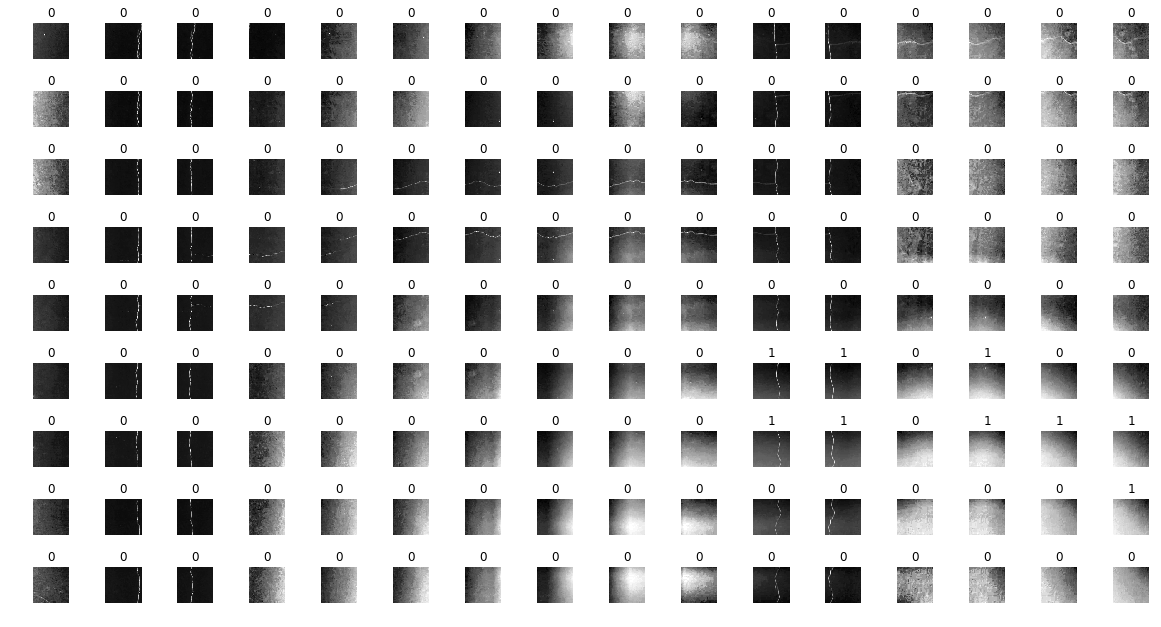

In [39]:
image_path=os.path.join(frame_folder, '00189.jpg')
frame = cv2.imread(image_path)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# frame_shadow_reduced = shadow_reduction.adaptiveThreshold(img)
imgs = rolling_window(img, window_size, stride)
print(imgs)
nx, ny,ox,oy = imgs.shape
cnn_result=(mypredictions.eval(feed_dict={X:imgs.reshape(-1,ox,oy),is_training:False}, session=sess)).reshape(nx,ny)
print(cnn_result)
frame_final = shade_area_old(frame, cnn_result, window_size, stride)
plt.figure(figsize=(10,5))

# plt.subplot(131),plt.imshow(img, cmap='gray')
# plt.title('Original'),plt.xticks([]),plt.yticks([])

# plt.subplot(132),plt.imshow(frame_shadow_reduced , cmap='gray')
# plt.title('Filtered'),plt.xticks([]),plt.yticks([])

# plt.subplot(133),plt.imshow(frame_final)
# plt.title('Bounding'),plt.xticks([]),plt.yticks([])

plt.show()

imgs -= 255
imgs *= -1

plt.figure(figsize=(20, 20 * nx / ny))

for i in range(nx):
    for j in range(ny):
        plt.subplot(nx, ny, i * ny + j + 1)
        plt.imshow(imgs[i, j],cmap='gray')
        plt.axis('off')
        plt.title(cnn_result[i, j])
        
        
plt.subplots_adjust(wspace=1, hspace=0)
plt.show()
